In [2]:
import os
import gc
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import sys
sys.path.append( '../util' )
import util as util

/var/folders/1s/tyt3m2l12dz6s028_blqch7r0000gn/T/ipykernel_58065/1971013312.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# DNN with 2 classes

In [2]:

##simplifying this 
# def create_binary_classification_model(input_shape):
#     inputs = Input(shape=(input_shape,))
#     x = Dense(128, activation='relu')(inputs)
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
#     x = Dense(64, activation='relu')(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
#     outputs = Dense(1, activation='sigmoid')(x)
#     model = Model(inputs=inputs, outputs=outputs)
#     model.compile(optimizer=Adam(learning_rate=0.001),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     return model

def create_binary_classification_model(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(inputs)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

train, test = util.import_dataset(2,"dnn")



y_train = train[util.y_column]
y_test = test[util.y_column]

X_train = train.drop(util.y_column, axis=1)
X_test = test.drop(util.y_column, axis=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

del train,test,y_train,y_test


model = create_binary_classification_model(len(util.X_columns))
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#https://keras.io/api/models/model_training_apis/
history = model.fit(x=X_train, y=y_train_encoded,
                    validation_split=0.2, epochs=100, 
                    batch_size=256, callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')
del X_train,X_test,y_train,y_test

Importing datasets.....
Processing training and test data....
Finished processing training and test data
Mapping labels to two classes.....
Data import and processing complete....
Epoch 1/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 100s 874us/step - accuracy: 0.9926 - loss: 0.0174 - val_accuracy: 0.9939 - val_loss: 0.0137
Epoch 2/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 99s 869us/step - accuracy: 0.9942 - loss: 0.0136 - val_accuracy: 0.9943 - val_loss: 0.0131
Epoch 3/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 123s 1ms/step - accuracy: 0.9943 - loss: 0.0132 - val_accuracy: 0.9944 - val_loss: 0.0132
Epoch 4/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 111s 977us/step - accuracy: 0.9944 - loss: 0.0130 - val_accuracy: 0.9945 - val_loss: 0.0128
Epoch 5/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 296s 3ms/step - accuracy: 0.9945 - loss: 0.0129 - val_accuracy: 0.9944 - val_loss: 0.0128
Epoch 6/100
113583/113583 ━━━━━━━━━━━━━━━━━━━━ 94s 820us/step - accuracy: 0.9945 - loss: 0.0127 - val_accuracy: 0.9944 - val_loss:

NameError: name 'y_train' is not defined

Test accuracy: 0.995025634765625, Test loss: 0.011546277441084385


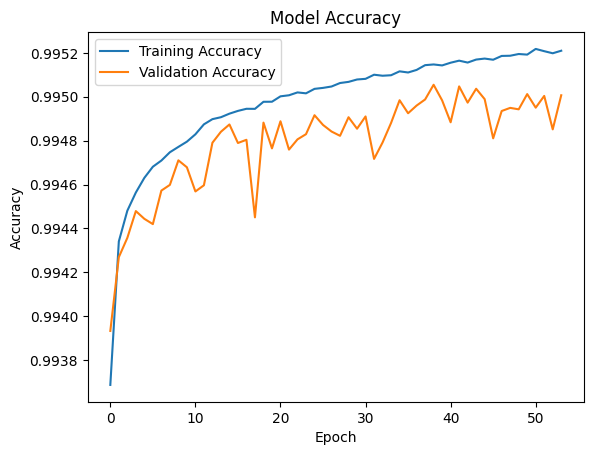

In [3]:
import matplotlib.pyplot as plt
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# 7 Class classifier DNN

In [7]:
def create_multiclass_classification_model(input_shape, num_classes):
    inputs = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(inputs)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [9]:
train, test = util.import_dataset(7,"dnn")
y_train = train[util.y_column]
y_test = test[util.y_column]

X_train = train.drop(util.y_column, axis=1)
X_test = test.drop(util.y_column, axis=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

del train,test,y_train,y_test
num_classes = len(label_encoder.classes_)
print(" Number of classes is:" )
print(num_classes)
print("")
model = create_multiclass_classification_model(len(util.X_columns),num_classes)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#https://keras.io/api/models/model_training_apis/
history = model.fit(x=X_train, y=y_train_encoded,
                    validation_split=0.2, epochs=100, 
                    batch_size=256, callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')
del X_train,X_test,y_train_encoded,y_test_encoded

Importing datasets.....
Processing training and test data....


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
import matplotlib.pyplot as plt
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 7 classes')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# 34 classes

In [ ]:
train, test = util.import_dataset(34,"dnn")
y_train = train[util.y_column]
y_test = test[util.y_column]

X_train = train.drop(util.y_column, axis=1)
X_test = test.drop(util.y_column, axis=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

del train,test,y_train,y_test
num_classes = len(label_encoder.classes_)
print(" Number of classes is:" )
print(num_classes)
print("")
model = create_multiclass_classification_model(len(util.X_columns),num_classes)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#https://keras.io/api/models/model_training_apis/
history = model.fit(x=X_train, y=y_train_encoded,
                    validation_split=0.2, epochs=100, 
                    batch_size=256, callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')
del X_train,X_test

In [ ]:
import matplotlib.pyplot as plt
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 34 classes')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()